<a href="https://colab.research.google.com/github/amir1m/learning-ml/blob/master/FCML_CoinToss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.special import comb
from scipy.stats import beta 

import matplotlib.pyplot as plt
import numpy as np

import time



In [0]:
def get_binomial_prob(N,y,r):
  return (comb(N, y) * (r ** y) * (1 - r) ** (N - y) )


In [0]:
def get_binomial_prob_dist(N = 10,r = 0.5):
  prob_y = []
  for y in range(0,N+1,1):
    prob_y.append(get_binomial_prob(N, y, r))
  return prob_y

In [0]:
def plot_dist(prob_y):
  N = len(prob_y)
  plt.bar(range(0,N), prob_y)
  plt.xticks(ticks=range(0,N))
  plt.xlabel("y")
  plt.ylabel("P(y)")
  plt.plot(range(0,N), prob_y)


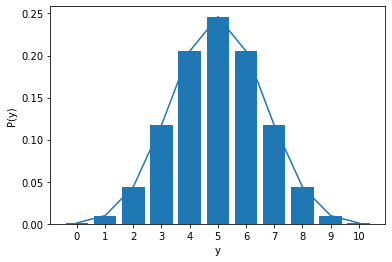

In [0]:
plot_dist(get_binomial_prob_dist(N = 10, r = 0.5))

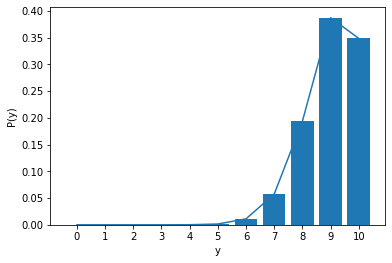

In [0]:
plot_dist(get_binomial_prob_dist(N = 10, r = 0.9))

## Bayesian

100 70 0.0
0.0
100 70 0.1
1.2451275062913506e-46
100 70 0.2
4.29277227415243e-27
100 70 0.30000000000000004
1.6571719548824243e-16
100 70 0.4
9.050559931901567e-10
100 70 0.5
2.3170690580135177e-05
100 70 0.6000000000000001
0.010007504885761992
100 70 0.7000000000000001
0.08678386475342806
100 70 0.8
0.005189643239948639
100 70 0.9
1.8404083917652642e-08


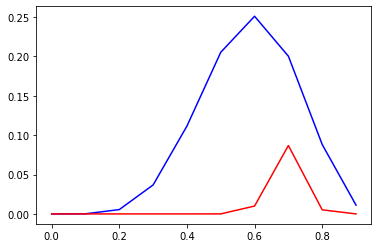

In [0]:
N = 10
Y_N = 6
p_yn_given_r = []
for r in np.arange(0,1, 0.1):
  p_yn_given_r.append(get_binomial_prob(N, Y_N, r))
plt.plot(np.arange(0,1, 0.1), p_yn_given_r, 'b')


N = 100
Y_N = 70
p_yn_given_r = []
for r in np.arange(0, 1, 0.1):
  p_yn_given_r.append(get_binomial_prob(N, Y_N, r))
  print(N, Y_N, r)
  print(get_binomial_prob(N, Y_N, r))
plt.plot(np.arange(0,1, 0.1), p_yn_given_r, 'r')

## Three Scenarios

### No prior knowledge (3.3.1)

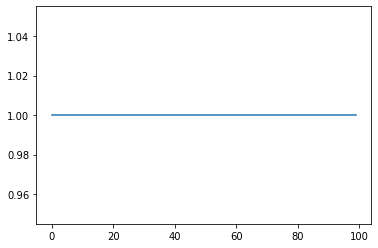

In [16]:
plt.plot(beta.pdf(np.linspace(0.0, 1.0, 100),1,1))

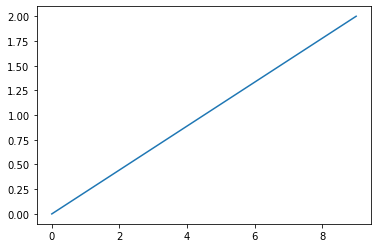

In [77]:
plt.plot(beta.pdf(np.linspace(0.0, 1.0, num = 10), 2,1)) # For one Toss as Head

In [78]:
tosses = [0,1,2,3,4,10]
heads = [0,1,1,2,3,6]
a = 1.0
b = 1.0
prob_yn_r = []
r_values = np.linspace(0.0,1.0, 10)
for i in range(0,6):
  N = tosses[i]
  yN = heads[i]
  delta = yN + a
  gamma = N - yN + b
  expectations = delta / (delta + gamma)
  variance = (delta * gamma) / ((delta + gamma)**2 * (delta + gamma + 1))
  print("Toss %d: \n\t Heads = %f, delta = %f, gamma = %f, expectations = %f, variance = %f" %(N,yN, delta, gamma,expectations,variance))
  prob_yn_r.append(beta.pdf(r_values, delta, gamma ))


Toss 0: 
	 Heads = 0.000000, delta = 1.000000, gamma = 1.000000, expectations = 0.500000, variance = 0.083333
Toss 1: 
	 Heads = 1.000000, delta = 2.000000, gamma = 1.000000, expectations = 0.666667, variance = 0.055556
Toss 2: 
	 Heads = 1.000000, delta = 2.000000, gamma = 2.000000, expectations = 0.500000, variance = 0.050000
Toss 3: 
	 Heads = 2.000000, delta = 3.000000, gamma = 2.000000, expectations = 0.600000, variance = 0.040000
Toss 4: 
	 Heads = 3.000000, delta = 4.000000, gamma = 2.000000, expectations = 0.666667, variance = 0.031746
Toss 10: 
	 Heads = 6.000000, delta = 7.000000, gamma = 5.000000, expectations = 0.583333, variance = 0.018697


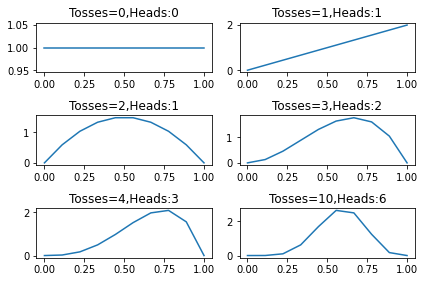

In [86]:
figure, axes = plt.subplots(nrows=3, ncols=2)
i = 0
for row in range(3):
  for col in range(2):
    axes[row, col].plot(r_values, prob_yn_r[i])
    axes[row, col].set_title('Tosses=%d,Heads:%d'%(tosses[i], heads[i]))
    i += 1
figure.tight_layout(pad=1.0)
